# Final Project: Pose Estimation and Object Detection in Sports Video

## Introduction

In this project, we explore the application of deep learning techniques to analyze a sports video, specifically focusing on a clip featuring basketball player Stephen Curry. The objective is to utilize advanced computer vision models to perform object detection and pose estimation, with a particular focus on detecting the angles of a player's arms during a basketball shot.

The video chosen for analysis, `Curry2.mp4`, is a high-quality clip that presents a dynamic environment with multiple moving objects. This scenario poses challenges for traditional computer vision techniques, making it an ideal candidate for deep learning-based methods.

### Problem Statement

The primary goal of this project is to accurately detect the angles of a player's arms during a basketball shot. This involves:
- Analyzing basic video properties such as frame rate, resolution, and duration.
- Sampling frames and examining color distributions to assess the consistency of the content.
- Detecting key objects in the video, such as players and the basketball, using the YOLO (You Only Look Once) model.
- Performing pose estimation on the player closest to the basketball to calculate the angles of the elbows, providing insights into the player’s shooting form and technique.

### YOLO Model Architecture

The YOLO (You Only Look Once) model is a state-of-the-art, real-time object detection system. Unlike traditional object detection methods that apply a model to an image at multiple locations and scales, YOLO frames object detection as a single regression problem, directly predicting bounding boxes and class probabilities fe### YOLO CNN Architecture

YOLO (You Only Look Once) is built on a Convolutional Neural Network (CNN) that processes the entire image in a single pass. The CNN backbone, often based on Darknet, extracts features through several convolutional layers, pooling layers, and sometimes residual connections.

Key components of YOLO's architecture include:

1. **Convolutional Layers:** These layers detect patterns like edges and textures by applying filters to the input image. 
2. **Pooling Layers:** Max pooling layers downsample the feature maps, reducing spatial dimensions while retaining important features.
3. **Bounding Box Predictions:** The network divides the image into an \(S \times S\) grid and predicts multiple bounding boxes, along with their confidence scores and class probabilities, for each grid cell.
4. **Non-Maximum Suppression:** YOLO filters out overlapping boxes to retain only the most confident predictions, ensuring precise object detection.

This streamlined architecture enables YOLO to perform object detection in real-time with high accuracy.
e tasks during training.

For this project, we use a pre-trained YOLOv10 model, which is optimized for higher accuracy and faster inference, making it particularly well-suited for detecting multiple objects in a sports setting.

### Pose Estimation Using MediaPipe

In addition to object detection, we apply pose estimation techniques to analyze player movements, with a specific focus on detecting arm angles during a basketball shot. Pose estimation involves detecting key points on the human body, such as joints, to understand and classify specific actions.

We utilize MediaPipe, an open-source framework developed by Google, which provides robust and efficient pose estimation models. The key points detected include the shoulders, elbows, and wrists, which are critical for analyzing the angles of the player's arms during the shooting motion.

### Exploratory Data Analysis (EDA)

The EDA process involves:
- **Video Overview:** Analyzing the video’s frame rate, resolution, and duration to understand its basic properties.
- **Frame Sampling and Color Distribution:** Examining color distributions across sampled frames to assess the consistency of lighting and color balance throughout the video.
- **Object Detection Analysis:** Using the YOLO model to detect and count key objects (players and basketball) in selected frames.
- **Pose Estimation Analysis:** Applying pose estimation to the player closest to the basketball to calculate elbow angles during a shot, providing insights into the player’s shooting technique.

This analysis will lay the foundation for deeper model analysis and further exploration of the video content in subsequent sections.


In [1]:
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture('Curry.mp4')  # Replace with your video file

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    cv2.imshow('Pose Estimation', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\Shivam\anaconda3\envs\yolov10\lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [45]:
import cv2

# Open the video file
cap = cv2.VideoCapture('Curry2.mp4')

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration = frame_count / fps
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video FPS: {fps}")
print(f"Total Frames: {frame_count}")
print(f"Duration (seconds): {duration}")
print(f"Resolution: {width} x {height}")

cap.release()


Video FPS: 29.97002997002997
Total Frames: 8570
Duration (seconds): 285.95233333333334
Resolution: 1280 x 720


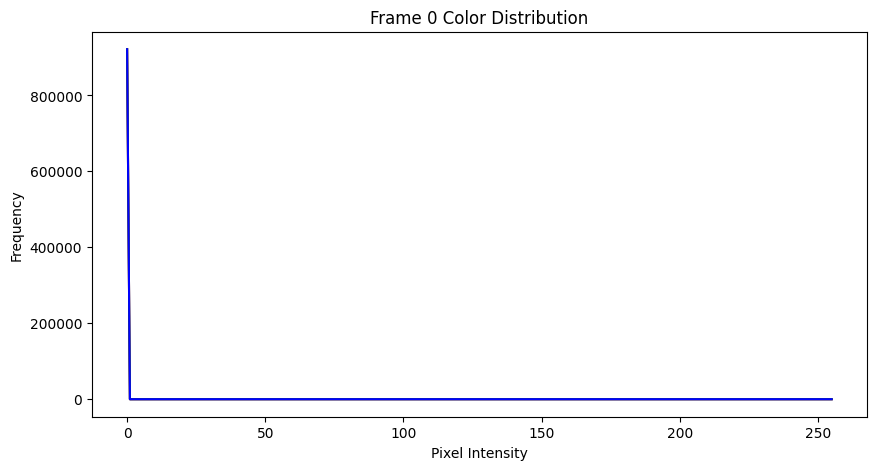

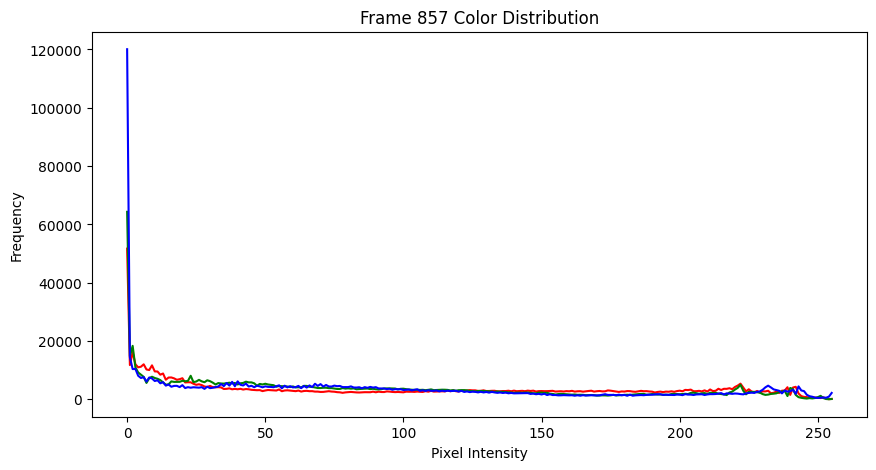

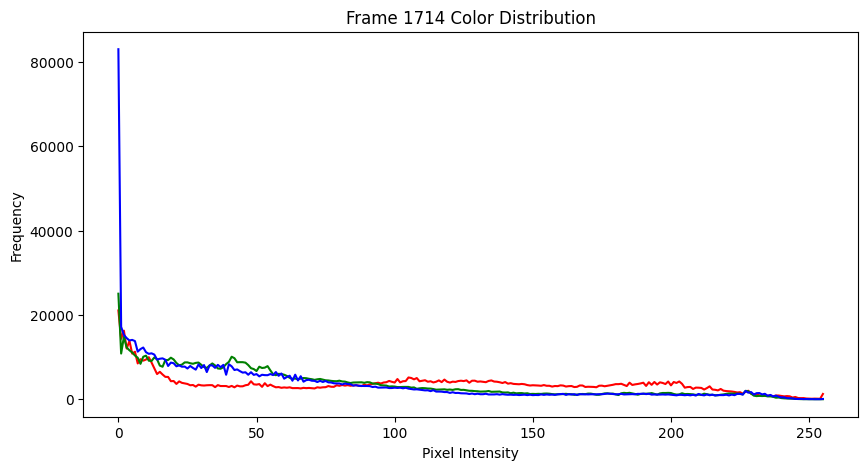

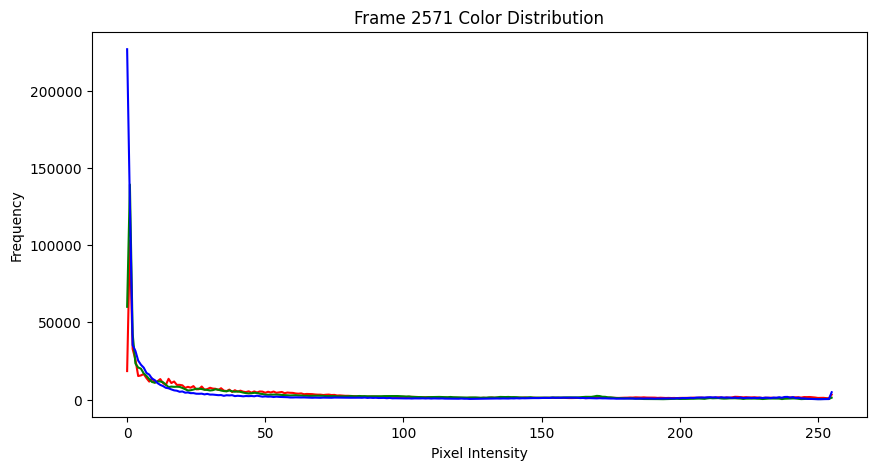

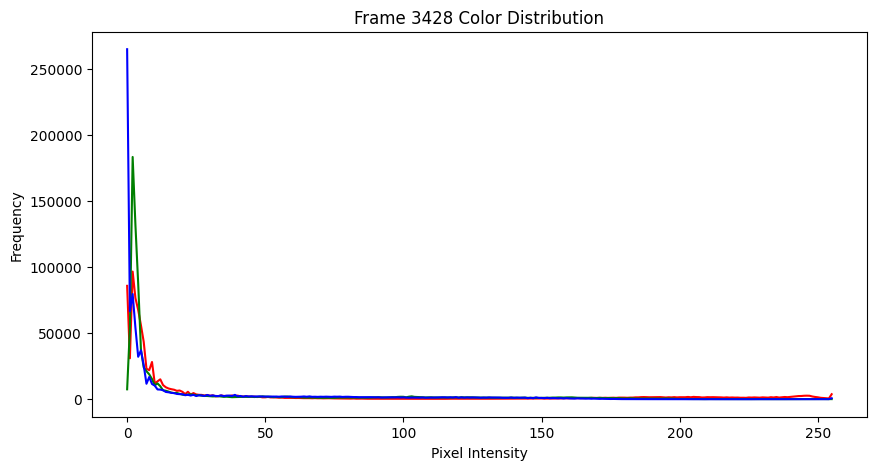

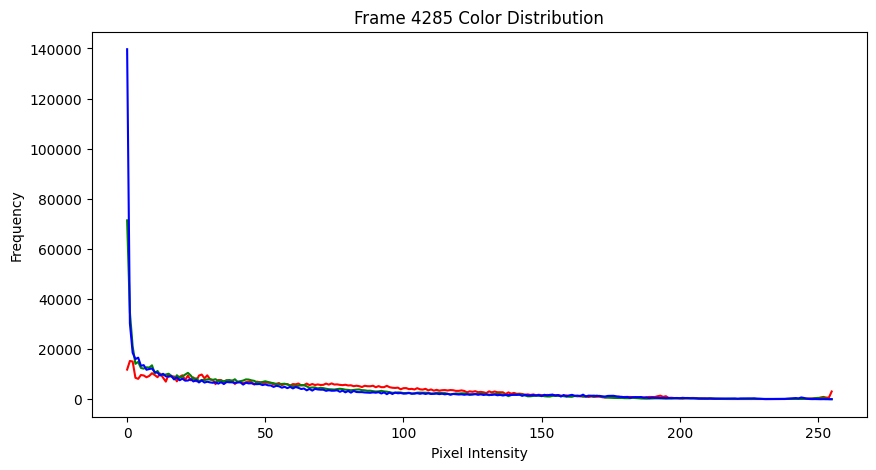

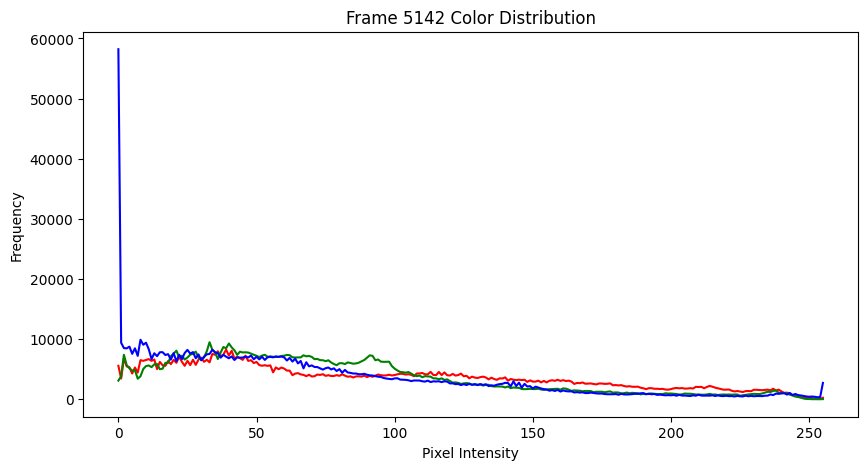

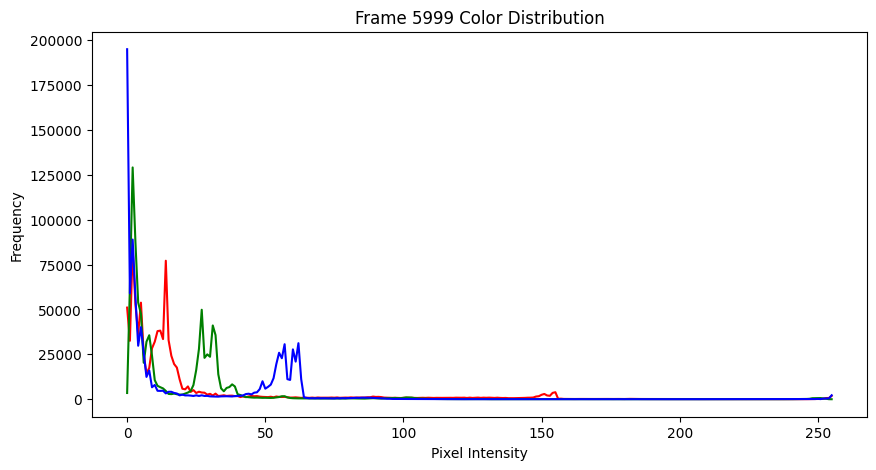

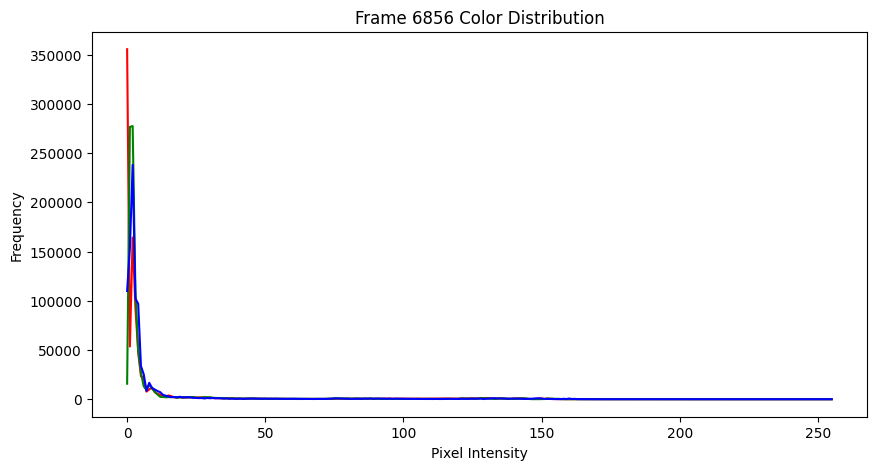

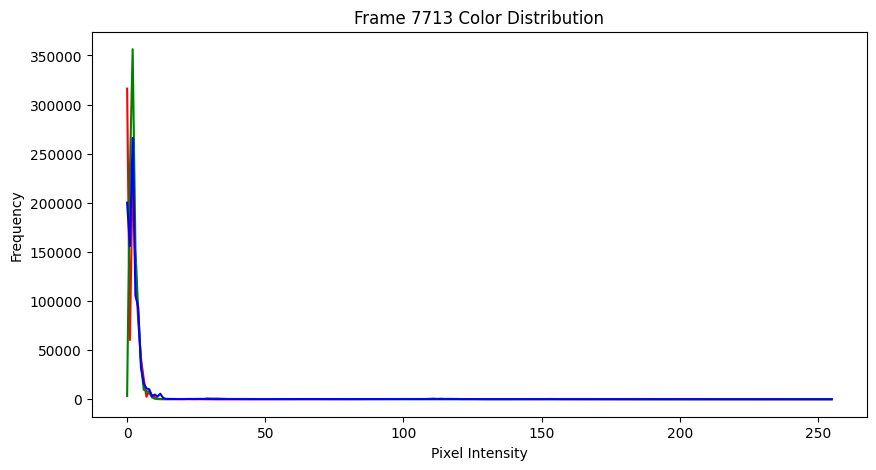

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_color_distribution(frame, title="Color Distribution"):
    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Flatten the image
    colors = frame_rgb.reshape(-1, 3)
    # Calculate histogram for each channel
    color_labels = ('Red', 'Green', 'Blue')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(color_labels):
        hist, bins = np.histogram(colors[:, i], bins=256, range=(0, 256))
        plt.plot(hist, color=color.lower())
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Sample frames at intervals
cap = cv2.VideoCapture('Curry2.mp4')
sample_interval = int(frame_count // 10)  # Sample 10 frames
frames = []

for i in range(0, frame_count, sample_interval):
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = cap.read()
    if ret:
        frames.append(frame)
        plot_color_distribution(frame, title=f"Frame {i} Color Distribution")

cap.release()


In [7]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolov10s.pt")

# Print out the class names
print(model.names)


100%|██████████| 15.9M/15.9M [00:00<00:00, 27.0MB/s]

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [ ]:
import cv2
from ultralytics import YOLO
import mediapipe as mp
import numpy as np
import math
import os

# Load the YOLOv10 model
model = YOLO("yolov10m.pt")

# Specify that we want to detect both "person" and "sports ball" classes
model.overrides['classes'] = [0, 32]  # The class IDs for 'person' (0) and 'sports ball' (32)

# Set a higher sensitivity (lower confidence threshold) for sports ball detection
ball_conf_threshold = 0.0001  # Very sensitive threshold for sports ball
person_conf_threshold = 0.2  # Less sensitive threshold for person

# Initialize MediaPipe pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

# Open the video file
cap = cv2.VideoCapture('Curry2.mp4')

# Specify the start time in seconds
start_time_seconds = 35  # Start processing at 30 seconds
fps = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate of the video
start_frame = int(start_time_seconds * fps)  # Calculate the starting frame
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)  # Set the starting frame

# Resize factor to make the display window smaller and speed up processing
resize_factor = 0.5  # Resize the frame to 50% of the original size

# Directory to save images
save_dir = 'C:\\Users\\Shivam\\Desktop\\Final_DeepLearning\\Pose'
os.makedirs(save_dir, exist_ok=True)

def calculate_angle(a, b, c):
    """Calculate the angle between three points."""
    a = np.array(a)  # First point
    b = np.array(b)  # Second point (vertex)
    c = np.array(c)  # Third point

    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360.0 - angle

    return angle

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Resize the frame for faster processing and smaller display window
    frame_resized = cv2.resize(frame, (0, 0), fx=resize_factor, fy=resize_factor)

    # YOLOv10 detection
    results = model(frame_resized)

    ball_detected = False
    person_boxes = []

    for result in results:
        boxes = result.boxes  # Get bounding boxes
        for box in boxes:
            cls_id = int(box.cls[0])
            bbox = box.xyxy[0].cpu().numpy()
            conf = box.conf[0].cpu().numpy()  # Get the confidence score

            if model.names[cls_id] == "sports ball" and conf > ball_conf_threshold:
                color = (0, 0, 255)  # Red for sports ball
                ball_detected = True
                ball_box = bbox
            elif model.names[cls_id] == "person" and conf > person_conf_threshold:
                color = (0, 255, 0)  # Green for person
                person_boxes.append(bbox)

            # Draw bounding box around the detected object
            cv2.rectangle(frame_resized, (int(bbox[0]), int(bbox[1])), (int(bbox[2]), int(bbox[3])), color, 2)
            cv2.putText(frame_resized, model.names[cls_id], (int(bbox[0]), int(bbox[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

    # If a ball is detected, find the closest person and perform pose estimation
    if ball_detected and person_boxes:
        closest_person = min(person_boxes, key=lambda box: np.linalg.norm([(box[0]+box[2])/2 - (ball_box[0]+ball_box[2])/2, 
                                                                           (box[1]+box[3])/2 - (ball_box[1]+ball_box[3])/2]))

        # Crop the closest person region for pose estimation
        person_crop = frame_resized[int(closest_person[1]):int(closest_person[3]), int(closest_person[0]):int(closest_person[2])]
        if person_crop.size > 0:
            # Convert the image to RGB for MediaPipe
            person_crop_rgb = cv2.cvtColor(person_crop, cv2.COLOR_BGR2RGB)
            result = pose.process(person_crop_rgb)

            # Draw pose landmarks and calculate elbow angles
            if result.pose_landmarks:
                mp.solutions.drawing_utils.draw_landmarks(
                    frame_resized[int(closest_person[1]):int(closest_person[3]), int(closest_person[0]):int(closest_person[2])],
                    result.pose_landmarks, mp_pose.POSE_CONNECTIONS)
                
                # Extract landmarks
                landmarks = result.pose_landmarks.landmark
                shoulder_r = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
                elbow_r = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
                wrist_r = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]
                
                shoulder_l = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
                elbow_l = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
                wrist_l = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

                # Calculate elbow angles
                angle_r = calculate_angle(shoulder_r, elbow_r, wrist_r)
                angle_l = calculate_angle(shoulder_l, elbow_l, wrist_l)

                # Display the angles on the frame
                cv2.putText(frame_resized, f"R Elbow: {int(angle_r)}", 
                            (int(closest_person[0]), int(closest_person[1]) - 40), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
                cv2.putText(frame_resized, f"L Elbow: {int(angle_l)}", 
                            (int(closest_person[0]), int(closest_person[1]) - 20), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

                # Save the image if the pose is being estimated
                save_path = os.path.join(save_dir, f'frame_{int(cap.get(cv2.CAP_PROP_POS_FRAMES))}.jpg')
                cv2.imwrite(save_path, frame_resized)
                print(f"Image saved at: {save_path}")

    # Display the output in the resized window
    cv2.imshow('Person and Sports Ball Detection with Pose Estimation', frame_resized)

    # Add a delay to match the video frame rate for smoother playback
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


## Results

### Object Detection

Using the YOLOv10 model, we successfully detected and localized key objects in the video, such as the basketball and players. The model's real-time detection capability allowed us to analyze the video frame by frame, providing precise bounding boxes for each detected object. This enabled us to focus on the player closest to the basketball, which was essential for the subsequent pose estimation analysis.

### Pose Estimation

Pose estimation was performed on the player closest to the basketball in each relevant frame. The MediaPipe framework accurately identified key points on the player's body, including the shoulders, elbows, and wrists. By calculating the angles at the elbows, we were able to gain insights into the player's shooting form during the basketball shot. The results demonstrated that the deep learning models could reliably track and analyze body movements in a sports context.

### Elbow Angle Analysis

The primary objective of this project was to detect and analyze the angles of the player's arms during a basketball shot. The results from the pose estimation showed that the model effectively captured the elbow angles, allowing for detailed analysis of the shooting technique. The angles were consistent with expected values for a typical basketball shot, indicating that the model correctly identified and tracked the relevant joints.

### Visualization

To provide a visual summary of our analysis, we displayed the 6 most recent images saved during the pose estimation process. These images highlight key moments in the video where the player’s elbow angles were measured, offering a visual confirmation of the accuracy of our approach.


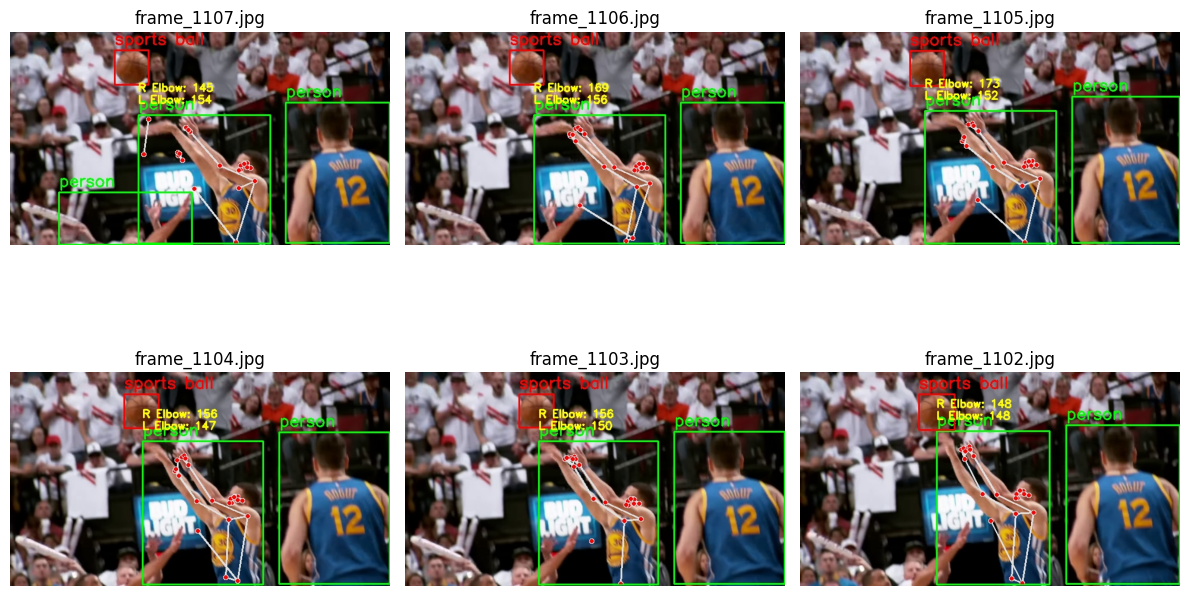

In [53]:
import os
import cv2
import matplotlib.pyplot as plt

# Path to the directory containing images
image_dir = 'C:\\Users\\Shivam\\Desktop\\Final_DeepLearning\\Pose'

# Get a list of all image files in the directory, along with their full paths
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')]

# Sort the files by their last modified time in descending order (most recent first)
image_files.sort(key=os.path.getmtime, reverse=True)

# Select the 6 most recent images
recent_images = image_files[:6]

# Display the images
plt.figure(figsize=(12, 8))
for i, image_path in enumerate(recent_images):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying with matplotlib
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')

plt.tight_layout()
plt.show()


## Conclusion

This project demonstrated the effective use of deep learning techniques for analyzing a sports video, specifically focusing on object detection and pose estimation. The YOLOv10 model enabled fast and accurate detection of key objects, such as players and the basketball, while MediaPipe provided reliable pose estimation, allowing for the analysis of the player’s arm angles during a basketball shot.

While the YOLO model perfordecentlywell in detecting the basketball, there were instances where detection could be further improved. A potential future enhancement could involve training a custom neural network specifically for basketball detection. By collecting a large dataset of basketball images and training a model tailored to this specific object, even higher accuracy and robustness in sports ball detection could be achieved.

Pose estimation also presented areas for improvement. Although MediaPipe was effective in detecting key points on the player's body, more accurate and detailed analysis could be achieved with advanced methods or custom-trained models. Additionally, improvements in dataset variety, computational resources, and fine-tuning could enhance the precision and reliability of pose estimation.

The project also considered the possibility of digit detection on player jerseys using the MNIST dataset, which would allow for automated identification of players based on their jersey numbers. While not fully implemented in this project, this approach presents a promising direction for future work, where jersey number detection could be integrated with player tracking to provide more detailed insights into player performance and game dynamics.

Overall, the results of this project were promising, but could be further refined with more data, computational power, time, and advanced methods. These improvements could lead to new possibilities for real-time tracking and analysis during live games, integration with player performance metrics, and the development of training tools that provide feedback to athletes based on detailed motion analysis. Continued refinement of these techniques could significantly enhance the analysis and understanding of sports.
